# Electrode Analysis with Graph
This analysis is based on the steps carried out in ElectrodeDemo. The final graph shows the amount of unscathed gold by radius, which

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x_min = -4
x_max = 50
y_min = 0
y_max = 6
grid_increment = 2
gold_area = np.ones((x_max-x_min+1, y_max-y_min+1))
gold_area = np.negative(gold_area)

In [19]:
for i in range(x_min, x_max+2, grid_increment): # even, 0 to 46
    for j in range(y_min, y_max+2, grid_increment): # even, 0 to 6
        
        #load image
        path_name = 'Gold Set 2/y{}_x{}.JPG'.format(j, i) #flipped
        print(path_name)
        src = cv2.imread(path_name)
        if src is None:
            continue
        
        #Create RGB, Grayscale, and Binary transformations
        original = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        imgray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
        _,alpha = cv2.threshold(imgray,55,255,cv2.THRESH_BINARY_INV)
        alpha = cv2.GaussianBlur(alpha, (21,21), cv2.BORDER_DEFAULT)
        
        #Using Hough Circle, find scope area
        hough_circle = cv2.HoughCircles(alpha, cv2.HOUGH_GRADIENT, 1.5, 100, param1=50,param2=30,minRadius=0,maxRadius=0)
        hough_circle = np.round(hough_circle[0, 0,:])
        (x,y) = (int(hough_circle[0]), int(hough_circle[1]))
        r = int(hough_circle[2])
        hc_area = np.pi*r**2
        
        #Delete all external area with bitwise_and
        circlemask = np.zeros(original.shape, dtype=np.uint8)
        cv2.circle(circlemask, (x,y), r, (255,255,255), -1)
        circlemask = cv2.cvtColor(circlemask,cv2.COLOR_BGR2GRAY)
        ROI = cv2.bitwise_and(original,original, mask=circlemask)
        
        #Transform to HSV, set upper and lower bounds of gold color, and find binary image with this gold range
        hsvimage = cv2.cvtColor(ROI, cv2.COLOR_RGB2HSV)
        lower = np.array([17, 137, 200], dtype="uint8")
        upper = np.array([50, 190, 255], dtype="uint8")
        goldmask = cv2.inRange(hsvimage, lower, upper)

        #Clean up binary image to remove noise
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        opening = cv2.morphologyEx(goldmask, cv2.MORPH_OPEN, kernel, iterations=1)

        #Only consider contours with significant area, draw all contours
        cnts = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnt_area = 0
        for c in cnts:
            currcontour = cv2.contourArea(c)
            if currcontour >= 2000:
                cnt_area += currcontour
                cv2.drawContours(ROI,[c], 0, (0,0,255), 2)
        
        #Calculating Area:
        perarea = cnt_area/hc_area
        #print('Contour area/Circle area = '+ str(cnt_area)+'/'+ str(hc_area)+' = ' +str(perarea))
        if perarea > 1:
            perarea = 1 
        #print(perarea)
        
        #insert into array
        gold_area[i-x_min, j-y_min] = perarea
        
#src = cv2.imread('Gold Set 2/y4_x10.JPG')
#original = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
#imgray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
#_,alpha = cv2.threshold(imgray,55,255,cv2.THRESH_BINARY_INV)
#alpha = cv2.GaussianBlur(alpha, (21,21), cv2.BORDER_DEFAULT)

Gold Set 2/y0_x-4.JPG
Gold Set 2/y2_x-4.JPG
Gold Set 2/y4_x-4.JPG
Gold Set 2/y6_x-4.JPG
Gold Set 2/y0_x-2.JPG
Gold Set 2/y2_x-2.JPG
Gold Set 2/y4_x-2.JPG
Gold Set 2/y6_x-2.JPG
Gold Set 2/y0_x0.JPG
Gold Set 2/y2_x0.JPG
Gold Set 2/y4_x0.JPG
Gold Set 2/y6_x0.JPG
Gold Set 2/y0_x2.JPG
Gold Set 2/y2_x2.JPG
Gold Set 2/y4_x2.JPG
Gold Set 2/y6_x2.JPG
Gold Set 2/y0_x4.JPG
Gold Set 2/y2_x4.JPG
Gold Set 2/y4_x4.JPG
Gold Set 2/y6_x4.JPG
Gold Set 2/y0_x6.JPG
Gold Set 2/y2_x6.JPG
Gold Set 2/y4_x6.JPG
Gold Set 2/y6_x6.JPG
Gold Set 2/y0_x8.JPG
Gold Set 2/y2_x8.JPG
Gold Set 2/y4_x8.JPG
Gold Set 2/y6_x8.JPG
Gold Set 2/y0_x10.JPG
Gold Set 2/y2_x10.JPG
Gold Set 2/y4_x10.JPG
Gold Set 2/y6_x10.JPG
Gold Set 2/y0_x12.JPG
Gold Set 2/y2_x12.JPG
Gold Set 2/y4_x12.JPG
Gold Set 2/y6_x12.JPG
Gold Set 2/y0_x14.JPG
Gold Set 2/y2_x14.JPG
Gold Set 2/y4_x14.JPG
Gold Set 2/y6_x14.JPG
Gold Set 2/y0_x16.JPG
Gold Set 2/y2_x16.JPG
Gold Set 2/y4_x16.JPG
Gold Set 2/y6_x16.JPG
Gold Set 2/y0_x18.JPG
Gold Set 2/y2_x18.JPG
Gold Set

In [ ]:
print(str(gold_area))

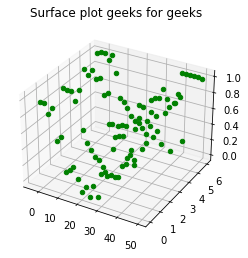

In [22]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
for i in range(x_min, x_max+2, grid_increment): # even, 0 to 46
    for j in range(y_min, y_max+2, grid_increment): # even, 0 to 6
        curr_area = gold_area[i-x_min, j-y_min]
        if curr_area != -1:
            ax.scatter(i, j, curr_area, color ='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()